In [13]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
x,y = make_blobs(n_samples = 1000,n_features = 2,centers = 4,random_state = 4)
x.shape

(1000, 2)

for n_clusters =  4 
 The average silhouette_score is: 0.6357722725081977


Text(0.5, 0.98, 'silhouette analysis for KMeans clustering on sample data with n_clusters = 4')

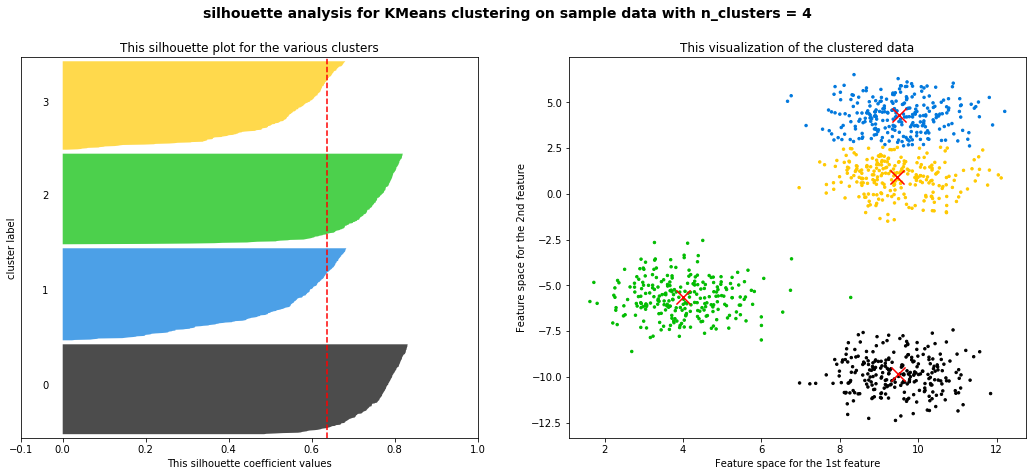

In [36]:
n_clusters = 4
fig,(ax1,ax2) = plt.subplots(1,2)
fig.set_size_inches(18,7)
ax1.set_xlim([-0.1,1])
ax1.set_ylim([0,x.shape[0] + (n_clusters +1)*10])
clusterer = KMeans(n_clusters = n_clusters,random_state = 10).fit(x)
cluster_labels = clusterer.labels_
silhouette_avg = silhouette_score(x,cluster_labels)
print("for n_clusters = ",n_clusters,'\n',
     "The average silhouette_score is:",silhouette_avg)
sample_silhouette_values = silhouette_samples(x,cluster_labels)

y_lower =10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()
#     print(ith_cluster_silhouette_values.shape)
    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    color = cm.nipy_spectral(float(i)/n_clusters)
    
    ax1.fill_betweenx(np.arange(y_lower,y_upper),ith_cluster_silhouette_values,
                     facecolor = color,alpha = 0.7)
    ax1.text(-0.05,y_lower + 0.5* size_cluster_i,str(i))
    y_lower = y_upper + 10
ax1.set_title("This silhouette plot for the various clusters")  
ax1.set_xlabel("This silhouette coefficient values")
ax1.set_ylabel("cluster label")

ax1.axvline(x = silhouette_avg,color = 'red',linestyle = "--")
ax1.set_yticks([])
ax1.set_xticks([-0.1,0,0.2,0.4,0.6,0.8,1])

colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

ax2.scatter(x[:,0],x[:,1],marker = 'o',s =6,c = colors)

center = clusterer.cluster_centers_
ax2.scatter(center[:,0],center[:,1],marker = 'x',c = 'red',alpha = 1,s = 200)

ax2.set_title("This visualization of the clustered data")
ax2.set_xlabel('Feature space for the 1st feature')
ax2.set_ylabel('Feature space for the 2nd feature')

plt.suptitle(("silhouette analysis for KMeans clustering on sample data with n_clusters = %d"%n_clusters),
            fontsize =14,fontweight  = 'bold')